In [1]:
import numpy as np
import pandas as pd
import os
import re

In [2]:
pd.set_option('display.max_colwidth', 200)

In [3]:
# pills_data.csv
data = pd.read_csv("../data/pills_data.csv")
data.head(1)

,품목일련번호,품목명,업소일련번호,업소명,성상,큰제품이미지,표시앞,표시뒤,의약품제형,색상앞,...,품목허가일자,제형코드명,표기내용앞,표기내용뒤,표기이미지앞,표기이미지뒤,표기코드앞,표기코드뒤,변경일자,Unnamed: 29
0,200808876,가스디알정50밀리그램(디메크로틴산마그네슘),19540006,일동제약(주),녹색의원형필름코팅정,https://nedrug.mfds.go.kr/pbp/cmn/itemImageDownload/147426403087300104,IDG,-,원형,연두,...,20080820,당의정,-,-,-,-,-,-,-,NaN


# df 생성

In [20]:
IMAGE_DIR = "../data/img"

def make_pill_df(image_dir=IMAGE_DIR):
  paths = []
  labels = []

  for dirname, _, filenames in os.walk("../data/img"):
    for filename in filenames:
      if '.jpg' in filename:
        file_path = dirname + "/" + filename
        paths.append(file_path)

        start_pos = file_path.find("\\")
        end_pos = file_path.rfind("/")
        pill_code = file_path[start_pos+1:end_pos]

        # 라벨 코드번호랑 매칭
        pill_name = data[data["품목일련번호"] == int(pill_code)]["품목명"]
        pill_name = re.split('[/,-,(,).:]', str(pill_name))[0][5:].strip().replace('\nName','')
        labels.append(pill_name)

  data_df = pd.DataFrame({'path':paths, 'label':labels})
  return data_df

In [21]:
data_df = make_pill_df(IMAGE_DIR)
data_df.head()

,path,label
0,../data/img\200808876/200808876.jpg,가스디알정50밀리그램
1,../data/img\200808876/200808876_0.jpg,가스디알정50밀리그램
2,../data/img\200808876/200808876_1.jpg,가스디알정50밀리그램
3,../data/img\200808876/200808876_10.jpg,가스디알정50밀리그램
4,../data/img\200808876/200808876_100.jpg,가스디알정50밀리그램


In [22]:
data_label = pd.get_dummies(data_df['label']).values
data_df['label_class'] = np.argmax(data_label, axis=1)

In [28]:
data_df

,path,label,label_class
0,../data/img\200808876/200808876.jpg,가스디알정50밀리그램,0
1,../data/img\200808876/200808876_0.jpg,가스디알정50밀리그램,0
2,../data/img\200808876/200808876_1.jpg,가스디알정50밀리그램,0
3,../data/img\200808876/200808876_10.jpg,가스디알정50밀리그램,0
4,../data/img\200808876/200808876_100.jpg,가스디알정50밀리그램,0
...,...,...,...
10195,../data/img\200903585/200903585_95.jpg,마이에신캡슐,26
10196,../data/img\200903585/200903585_96.jpg,마이에신캡슐,26
10197,../data/img\200903585/200903585_97.jpg,마이에신캡슐,26
10198,../data/img\200903585/200903585_98.jpg,마이에신캡슐,26


In [23]:
pill_dict = {}

label_num = len(data_df['label_class'].value_counts())

for i in range(label_num):
  pill_dict[i] = (data_df[data_df['label_class']==i]['label'].iloc[0])

In [24]:
pill_dict

{0: '가스디알정50밀리그램',
 1: '가스리드정5mg',
 2: '가스베트정5밀리그램',
 3: '가스파플러스정',
 4: '가스프렌정',
 5: '굿스펜연질캡슐',
 6: '그날엔정',
 7: '글리텍엠정2',
 8: '깅코탄연질캡슐120밀리그램',
 9: '노페인에프정',
 10: '뉴멘타민서방캡슐8밀리그램',
 11: '덴탈에프정',
 12: '덴티콤캡슐',
 13: '동광모니플루메이트정350mg',
 14: '디로탄정160mg',
 15: '디오살탄정160밀리그램',
 16: '디오살탄정80밀리그램',
 17: '디텐션정80밀리그램',
 18: '로수로드정10밀리그램',
 19: '리드비타큐정',
 20: '리버파워포르테연질캡슐',
 21: '리버풀350연질캡슐',
 22: '리버플란연질캡슐',
 23: '리피논정80밀리그램',
 24: '리피다운캡슐120밀리그람',
 25: '마그놀정',
 26: '마이에신캡슐',
 27: '마이칼디정',
 28: '맥스비타플러스정',
 29: '메디헤모연질캡슐',
 30: '메펜연질캡슐',
 31: '모니맥정',
 32: '모니메르정',
 33: '모니트정350밀리그램',
 34: '모니필정350밀리그램',
 35: '모빅캡슐15밀리그램',
 36: '모빅캡슐7',
 37: '미니메이드정',
 38: '미카몰정',
 39: '바르탄정',
 40: '발사르텔정160밀리그램',
 41: '발사르텔정80밀리그램',
 42: '발산정80밀리그램',
 43: '발크로버정500밀리그램',
 44: '발트렙정160밀리그램',
 45: '베리콜노즈정',
 46: '본렉스이알캡슐15밀리그램',
 47: '본렉스이알캡슐30밀리그램',
 48: '비나코연질캡슐',
 49: '비오펜연질캡슐',
 50: '비타마인연질캡슐',
 51: '비타엔큐연질캡슐',
 52: '사르발탄정160밀리그램',
 53: '산도스올란자핀정10밀리그램',
 54: '산도스올란자핀정2',
 55: '산도스올란자핀정5밀리그램',
 56: '선콜정',
 57: 

# 이미지 확인

In [25]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

def show_grid_images(image_path_list, ncols=6, title=None):
  figure, axs = plt.subplots(figsize=(20, 4), nrows=1, ncols=ncols)
  for i in range(ncols):
    image = cv2.cvtColor(cv2.imread(image_path_list[i]), cv2.COLOR_BGR2RGB)
    axs[i].imshow(image)
    axs[i].set_title(title)

In [26]:
pill_list = data_df['label'].value_counts().index.tolist()

c:\Users\korea\OneDrive\바탕 화면\wonderingPill_ai\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\korea\OneDrive\바탕 화면\wonderingPill_ai\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\korea\OneDrive\바탕 화면\wonderingPill_ai\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 46356 (\N{HANGUL SYLLABLE DI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\korea\OneDrive\바탕 화면\wonderingPill_ai\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50508 (\N{HANGUL SYLLABLE AL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\korea\OneDrive\바탕 화면\wonderingPill_ai\venv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: 

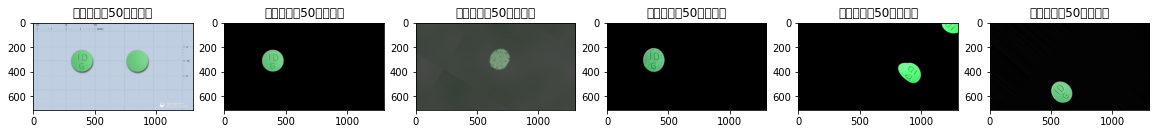

In [27]:
for iter_cnt, pill in enumerate(pill_list):
  pill_image_list = data_df[data_df['label'] == pill]['path'].iloc[:6].tolist()
  show_grid_images(pill_image_list, ncols=6, title=pill)

  break